In [109]:
import pandas as pd
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [14]:
ad_data = pd.read_csv("./Data/Advertising.csv",usecols=[1,2,3,4])

In [15]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
credit_data = pd.read_csv("Data/Credit.csv",usecols=range(1,12))

In [17]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [18]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


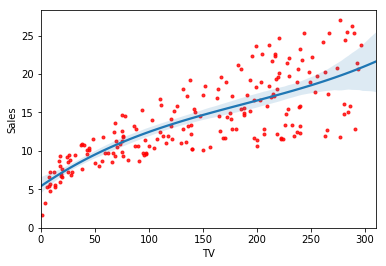

In [19]:
sns.regplot(ad_data.TV, ad_data.Sales, order=3, scatter_kws={'color':'r', 's':9})
plt.xlim(0,310)
plt.ylim(ymin=0);

In [25]:
regr = skl_lm.LinearRegression()

X = scale(ad_data.TV, with_mean=True, with_std=False).reshape(-1,1)
y = ad_data.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


In [26]:
regr.predict([[10]])

array([14.4978664])

In [27]:
X.reshape(1,-1)[0][0]

83.0575

In [28]:
scale?

Signature: scale(X, axis=0, with_mean=True, with_std=True, copy=True)
Docstring:
Standardize a dataset along any axis

Center to the mean and component wise scale to unit variance.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
X : {array-like, sparse matrix}
    The data to center and scale.

axis : int (0 by default)
    axis used to compute the means and standard deviations along. If 0,
    independently standardize each feature, otherwise (if 1) standardize
    each sample.

with_mean : boolean, True by default
    If True, center the data before scaling.

with_std : boolean, True by default
    If True, scale the data to unit variance (or equivalently,
    unit standard deviation).

copy : boolean, optional, default True
    set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array or a scipy.sparse
    CSC matrix and if axis is 1).

Notes
-----
This implementation will refuse to center scipy.s

(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([-146.3425, -116.7725,  -87.2025,  -57.6325,  -28.0625,    1.5075,
          31.0775,   60.6475,   90.2175,  119.7875,  149.3575]),
 <a list of 10 Patch objects>)

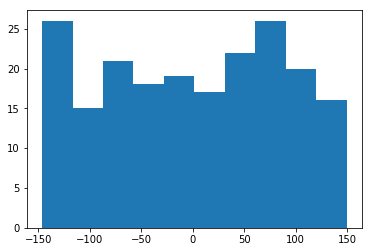

In [29]:
plt.hist(X)

In [93]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

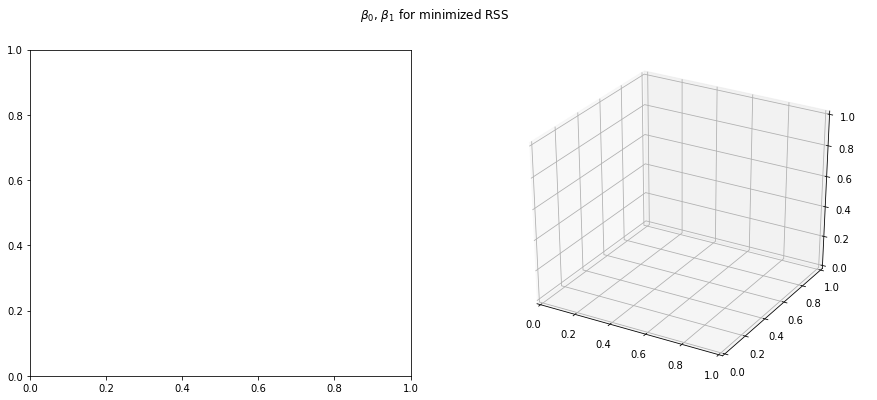

In [110]:
fig = plt.figure(figsize=(15,6))
fig.suptitle(min_RSS)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

In [112]:
ax1.clabel?

Signature: ax1.clabel(CS, *args, **kwargs)
Docstring:
Label a contour plot.

Call signature::

  clabel(cs, **kwargs)

Adds labels to line contours in *cs*, where *cs* is a
:class:`~matplotlib.contour.ContourSet` object returned by
contour.

::

  clabel(cs, v, **kwargs)

only labels contours listed in *v*.

Optional keyword arguments:

  *fontsize*:
    size in points or relative size e.g., 'smaller', 'x-large'

  *colors*:
    - if *None*, the color of each label matches the color of
      the corresponding contour

    - if one string color, e.g., *colors* = 'r' or *colors* =
      'red', all labels will be plotted in this color

    - if a tuple of matplotlib color args (string, float, rgb, etc),
      different labels will be plotted in different colors in the order
      specified

  *inline*:
    controls whether the underlying contour is removed or
    not. Default is *True*.

  *inline_spacing*:
    space in pixels to leave on each side of label when
    placing inline.  Defau